# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [7]:
pip install matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl (7.5 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'C:\\Users\\aubhi\\anaconda3\\Lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [5]:
pip install --upgrade matplotlib

  Obtaining dependency information for matplotlib from https://files.pythonhosted.org/packages/c9/46/6cbaf20f5bd0e7c1d204b45b853c2cd317b303fada90245f2825ecca47de/matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata
  Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl.metadata (5.8 kB)
     ---------------------------------------- 98.3/98.3 kB 2.8 MB/s eta 0:00:00
Using cached matplotlib-3.7.2-cp39-cp39-win_amd64.whl (7.5 MB)
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 32] The process cannot access the file because it is being used by another process: 'c:\\users\\aubhi\\anaconda3\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\DejaVuSans.ttf'
Consider using the `--user` option or check the permissions.



In [3]:
conda install -c conda-forge matplotlib

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done




Error processing line 1 of C:\Users\aubhi\anaconda3\lib\site-packages\matplotlib-3.7.2-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\aubhi\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
Error processing line 1 of C:\Users\aubhi\anaconda3\lib\site-packages\matplotlib-3.7.2-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\aubhi\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored
WARNING conda.gateways.disk.delete:unlink_or_rename_to_trash(188): Could not remove or rename C:\Users\aubhi\anaconda3\Lib\site-pack

## Package Plan ##

  environment location: C:\Users\aubhi\anaconda3

  added / updated specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    brotli-1.0.9               |       h0e60522_4         882 KB  conda-forge
    conda-23.7.2               |   py39hcbf5309_0         999 KB  conda-forge
    cycler-0.11.0              |     pyhd8ed1ab_0          10 KB  conda-forge
    kiwisolver-1.4.4           |   py39h2e07f2f_0          61 KB  conda-forge
    matplotlib-3.5.3           |   py39hcbf5309_2           7 KB  conda-forge
    matplotlib-base-3.5.3      |   py39he03a255_2         7.3 MB  conda-forge
    munkres-1.1.4              |     pyh9f0ad1d_0          12 KB  conda-forge
    pyparsing-3.1.1            |     pyhd8ed1ab_0          87 KB  conda-forge
    ------------------------------------------------------------
                                           Total:    

In [2]:
conda uninstall matplotlib

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\aubhi\anaconda3

  removed specs:
    - matplotlib


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    abseil-cpp-20211102.0      |       hd77b12b_0         1.7 MB
    aiofiles-22.1.0            |   py39haa95532_0          25 KB
    aiosqlite-0.18.0           |   py39haa95532_0          34 KB
    anaconda-client-1.12.0     |   py39haa95532_0         166 KB
    anyio-3.5.0                |   py39haa95532_0         167 KB
    argon2-cffi-21.3.0         |     pyhd3eb1b0_0          15 KB
    argon2-cffi-bindings-21.2.0|   py39h2bbff1b_0          36 KB
    arrow-cpp-11.0.0           |   py39h3577439_0         7.2 MB
    asttokens-2.0.5            |     pyhd3eb1b0_0          20 KB
    attrs-22.1.0               |   py39haa95532_0          84 KB
    aws-c-common-0.4.57        |       ha925a31_1         1

Error processing line 1 of C:\Users\aubhi\anaconda3\lib\site-packages\matplotlib-3.7.2-py3.9-nspkg.pth:

  Traceback (most recent call last):
    File "C:\Users\aubhi\anaconda3\lib\site.py", line 169, in addpackage
      exec(line)
    File "<string>", line 1, in <module>
    File "<frozen importlib._bootstrap>", line 562, in module_from_spec
  AttributeError: 'NoneType' object has no attribute 'loader'

Remainder of file ignored


  qtwebkit           pkgs/main/win-64::qtwebkit-5.212-h2bbfb41_5 
  re2                pkgs/main/win-64::re2-2022.04.01-hd77b12b_0 
  requests-toolbelt  pkgs/main/win-64::requests-toolbelt-1.0.0-py39haa95532_0 
  rfc3339-validator  pkgs/main/win-64::rfc3339-validator-0.1.4-py39haa95532_0 
  rfc3986-validator  pkgs/main/win-64::rfc3986-validator-0.1.1-py39haa95532_0 
  stack_data         pkgs/main/noarch::stack_data-0.2.0-pyhd3eb1b0_0 
  tinycss2           pkgs/main/win-64::tinycss2-1.2.1-py39haa95532_0 
  typing-extensions  pkgs/main/win-64::typing-extensions-4.7.1-py39haa95532_0 
  utf8proc           pkgs/main/win-64::utf8proc-2.6.1-h2bbff1b_0 
  websocket-client   pkgs/main/win-64::websocket-client-0.58.0-py39haa95532_4 
  xyzservices        pkgs/main/win-64::xyzservices-2022.9.0-py39haa95532_1 
  y-py               pkgs/main/win-64::y-py-0.5.9-py39hb6bf4ef_0 
  ypy-websocket      pkgs/main/win-64::ypy-websocket-0.8.2-py39haa95532_0 
  zeromq             pkgs/main/win-64::zeromq-4.3.











setuptools-68.0.0    | 925 KB    | 1          |   2% 











pyopenssl-23.2.0     | 96 KB     | #6         |  17% 







jupyterlab-3.6.3     | 4.3 MB    | ##6        |  27% 












prompt-toolkit-3.0.3 | 565 KB    | 2          |   3% 


importlib_metadata-6 | 8 KB      | ########## | 100% 






debugpy-1.6.7        | 2.9 MB    | ######7    |  68% 













parso-0.8.3          | 70 KB     | ##2        |  23% 










setuptools-68.0.0    | 925 KB    | ######4    |  64% 
libdeflate-1.17      | 151 KB    | ########## | 100% 
libdeflate-1.17      | 151 KB    | ########## | 100% 







jupyterlab-3.6.3     | 4.3 MB    | #####9     |  59% 












prompt-toolkit-3.0.3 | 565 KB    | #####3     |  54% 














aws-checksums-0.1.9  | 50 KB     | ###1       |  32% 















ipykernel-6.25.0     | 233 KB    | 6          |   7% 
















fsspec-2023.4.0      | 234 KB    | 6          |   7% 

















conda-package-handli | 287 KB    | 5  

In [1]:
import matplotlib.pyplot as plt

In [13]:
pip list

Package                       Version
----------------------------- ---------
absl-py                       1.4.0
aiofiles                      22.1.0
aiohttp                       3.8.4
aiosignal                     1.3.1
aiosqlite                     0.18.0
anaconda-client               1.12.0
anaconda-navigator            2.4.1
anndata                       0.9.2
annotated-types               0.5.0
anyio                         3.5.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
asttokens                     2.0.5
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         22.1.0
Babel                         2.11.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
backports.tempfile            1.0
backports.weakref             1.0.post1
bayesian-optimization         1.4.2
beautifulsoup4                4.12.2
bleach                        4.1.0
bokeh                         3.2.1Note: you may


dacite                        1.8.1
dask                          2023.6.0
deap                          1.3.3
debugpy                       1.6.7
decorator                     5.1.1
defusedxml                    0.7.1
dill                          0.3.6
distributed                   2023.6.0
dunamai                       1.18.0
easydict                      1.10
entrypoints                   0.4
environment-kernels           1.2.0
executing                     0.8.3
fastjsonschema                2.16.2
featuretools                  0.27.0
filelock                      3.9.0
flatbuffers                   23.5.26
fonttools                     4.25.0
frozenlist                    1.3.3
fsspec                        2023.4.0
ftfy                          6.1.1
future                        0.18.3
gast                          0.4.0
gensim                        4.3.1
get_version                   3.5.4
glob2                         0.7
google-auth                   2.20.0
google-auth-oau

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [3]:
medical.shape

(1338, 8)

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In [15]:
medical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   children        1338 non-null   int64  
 4   smoker          1338 non-null   int64  
 5   region          1338 non-null   int64  
 6   charges         1338 non-null   float64
 7   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(6)
memory usage: 83.8 KB


In [26]:
pip install pandas-profiling

     ---------------------------------------- 0.0/42.5 MB ? eta -:--:--
     ---------------------------------------- 0.5/42.5 MB 10.0 MB/s eta 0:00:05
     - -------------------------------------- 2.1/42.5 MB 22.1 MB/s eta 0:00:02
     - -------------------------------------- 2.1/42.5 MB 22.1 MB/s eta 0:00:02
     -- ------------------------------------- 3.1/42.5 MB 16.7 MB/s eta 0:00:03
     -- ------------------------------------- 3.1/42.5 MB 16.7 MB/s eta 0:00:03
     ---- ----------------------------------- 4.6/42.5 MB 16.3 MB/s eta 0:00:03
     ------ --------------------------------- 6.5/42.5 MB 19.9 MB/s eta 0:00:02
     -------- ------------------------------- 8.8/42.5 MB 23.3 MB/s eta 0:00:02
     ---------- ---------------------------- 11.2/42.5 MB 28.5 MB/s eta 0:00:02
     ------------ -------------------------- 13.2/42.5 MB 36.4 MB/s eta 0:00:01
     -------------- ------------------------ 15.9/42.5 MB 50.4 MB/s eta 0:00:01
     ---------------- ---------------------- 18.

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anndata 0.9.2 requires h5py>=3, which is not installed.
pynndescent 0.5.10 requires llvmlite>=0.30, which is not installed.
pynndescent 0.5.10 requires numba>=0.51.2, which is not installed.
scanpy 1.7.0rc1 requires h5py>=2.10.0, which is not installed.
scanpy 1.7.0rc1 requires numba>=0.41.0, which is not installed.
scanpy 1.7.0rc1 requires tables, which is not installed.
tensorboard 2.13.0 requires werkzeug>=1.0.1, which is not installed.
tensorflow-intel 2.13.0 requires h5py>=2.9.0, which is not installed.
tensorflow-intel 2.13.0 requires wrapt>=1.11.0, which is not installed.
torch 2.0.1 requires sympy, which is not installed.
transformers 4.30.1 requires regex!=2019.12.17, which is not installed.
umap-learn 0.4.6 requires numba!=0.47,>=0.46, which is not installed.
pydantic-settings 2.0.2 requires pydantic>=2.

In [32]:
!pip install --upgrade pandas-profiling

In [33]:
from pandas_profiling import ProfileReport

ImportError: cannot import name 'ProfileReport' from 'pandas_profiling' (unknown location)

In [30]:
profile = ProfileReport(medical)
#profile.to_file("data_report.html") 

NameError: name 'ProfileReport' is not defined

In [34]:
medical.shape

(1338, 8)

__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__

(array([536., 398., 129.,  86.,  35.,  59.,  57.,  32.,   2.,   4.]),
 array([ 1121.8739  ,  7386.729311, 13651.584722, 19916.440133,
        26181.295544, 32446.150955, 38711.006366, 44975.861777,
        51240.717188, 57505.572599, 63770.42801 ]),
 <BarContainer object of 10 artists>)

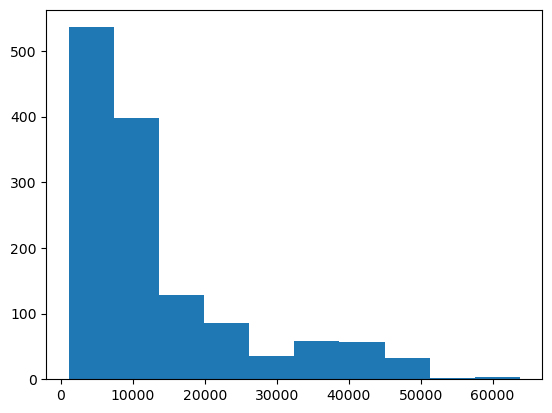

In [8]:
plt.hist(medical['charges'])

<Axes: >

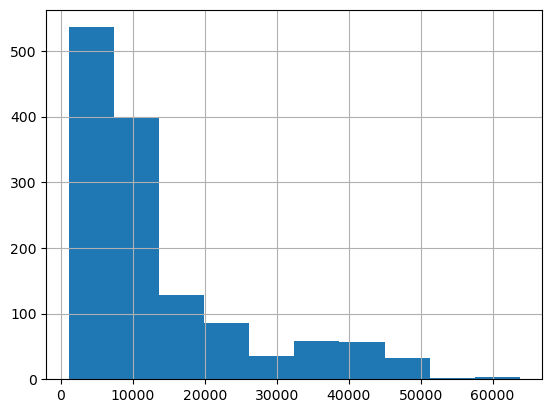

In [14]:
medical['charges'].hist()

In [21]:
pip install seaborn

     ---------------------------------------- 0.0/293.3 kB ? eta -:--:--
     -------------------------------------  286.7/293.3 kB 5.9 MB/s eta 0:00:01
     -------------------------------------- 293.3/293.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scanpy 1.7.0rc1 requires h5py>=2.10.0, which is not installed.
scanpy 1.7.0rc1 requires networkx>=2.3, which is not installed.
scanpy 1.7.0rc1 requires numba>=0.41.0, which is not installed.
scanpy 1.7.0rc1 requires patsy, which is not installed.
scanpy 1.7.0rc1 requires tables, which is not installed.
ydata-profiling 4.3.2 requires numpy<1.24,>=1.16.0, but you have numpy 1.24.3 which is incompatible.
ydata-profiling 4.3.2 requires pydantic<2,>=1.8.1, but you have pydantic 2.0.3 which is incompatible.
ydata-profiling 4.3.2 requires scipy<1.11,>=1.4.1, but you have scipy 1.11.1 which is incompatible.


<Axes: xlabel='charges', ylabel='Density'>

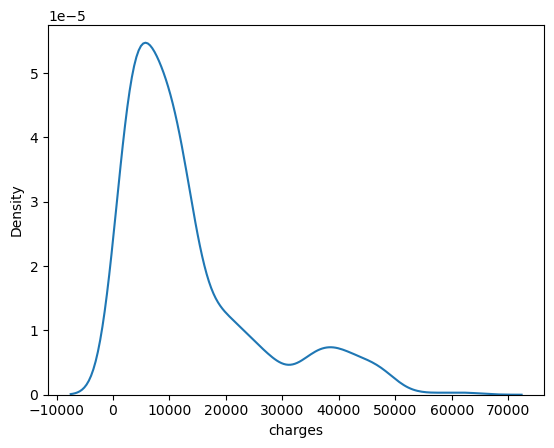

In [22]:
import seaborn as sns
sns.kdeplot(medical['charges'])

In [17]:
medical.describe()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265,0.585202
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237,0.492871
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515,1.000000
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010,1.000000


mean: 13270 and stdev: 12110; the data is highly left skewed with a long tail. There seems to be a secondary mode around 4000.

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__: We would use single tail t-test. Confidence interval will determine if it is above or below 12,000.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ one sided (since we don't care about increase)

In [35]:
deg_freedom = len(medical)-1
mean = medical['charges'].mean()
stdev = medical['charges'].std()
t.interval(0.95, deg_freedom, mean, stdev/np.sqrt(len(medical)))

(12620.954034192644, 13919.890496089869)

The interval is above 12000 (by more than 600USD). So mean is not below 12000

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__


 Null hypothesis: Everyone is charged the same.
 Alternative hypothesis: There is a different charge for the two groups.
 
Assumption: The values are normally distributed; equal variance between growups. We know from the distribution is not normal, hence a mann-whitney test would have been ideal in this case

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ 

In [38]:
insurance = medical.loc[medical['insuranceclaim'] == 1, 'charges']
no_insurance = medical.loc[medical['insuranceclaim'] == 0, 'charges']

sp_numerator = np.sum([(len(insurance)-1)*np.std(insurance)**2, (len(no_insurance)-1)*np.std(no_insurance)**2])
sp_denominator = len(insurance) + len(no_insurance) - 2

sp = np.sqrt(np.divide(sp_numerator, sp_denominator))
sp

11512.282899205744

In [39]:
t_numerator = np.mean(insurance) - np.mean(no_insurance)
t_denominator = sp * np.sqrt(1/len(insurance) + 1/len(no_insurance))
t = np.divide(t_numerator, t_denominator)
t

11.90130694355539

In [41]:
from scipy.stats import ttest_ind
ttest_ind(insurance, no_insurance)

TtestResult(statistic=11.893299030876712, pvalue=4.461230231620717e-31, df=1336.0)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ Z test is for when population mean is known and not for sample mean

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test